# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
import src.utils.utils as utils
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns
from pathlib import Path

# Use seaborn style defaults and set the default figure size
fig_size = (12, 8)
sns.set(rc={"figure.figsize": fig_size})
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 3.0})
style.use("seaborn-colorblind")
sns.set_style("ticks")

# Setup the correct foldure structure
project_dir = Path().resolve().parents[1]
model_dir = project_dir / "models" / "saved-models"
model_intermediate_dir = model_dir / "intermediate"

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers

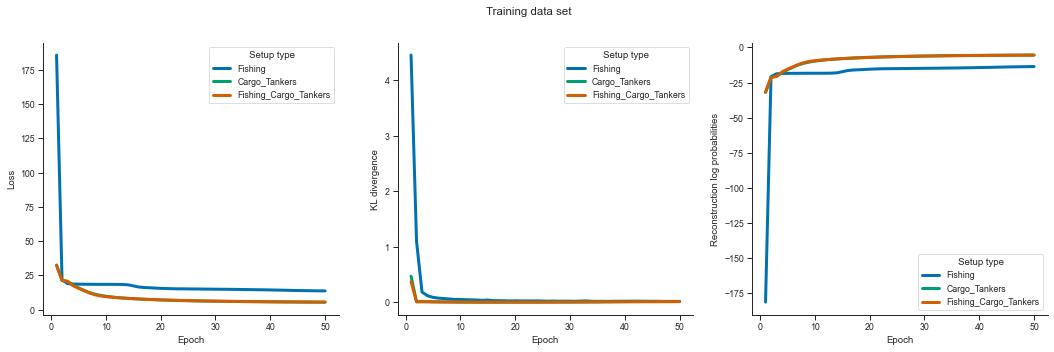

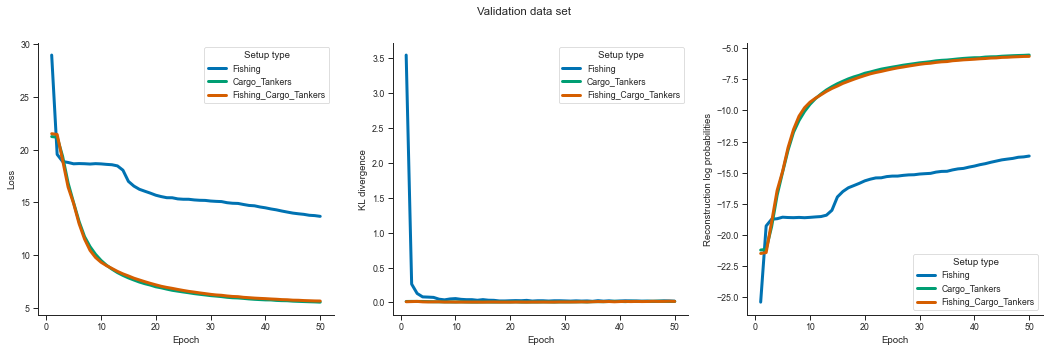

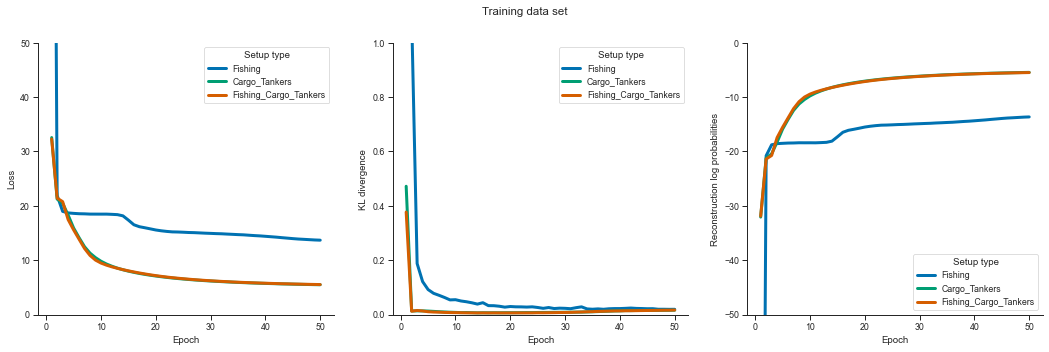

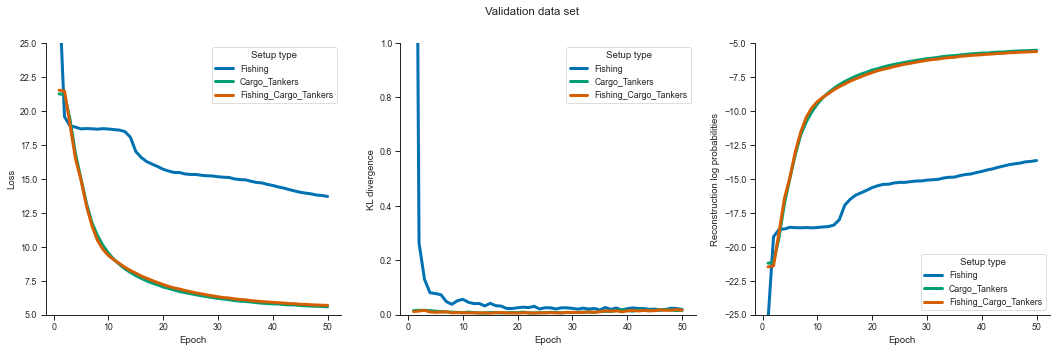

In [2]:
df_default_fish = utils.curves_df("Fishing", "RegionBornholm_01062019_30092019_Fish_14400_86400_600", model_dir)
df_default_carg_tank = utils.curves_df("Cargo_Tankers", "RegionBornholm_01062019_30092019_CargTank_14400_86400_600", model_dir)
df_default_fish_carg_tank = utils.curves_df("Fishing_Cargo_Tankers", "RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600", model_dir)

df = pd.concat([df_default_fish, df_default_carg_tank, df_default_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                  ylims=[(0, 50), (0, 1), (-50, 0)])
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                  ylims=[(5, 25), (0, 1), (-25, -5)])

# Annealed Kullback–Leibler 

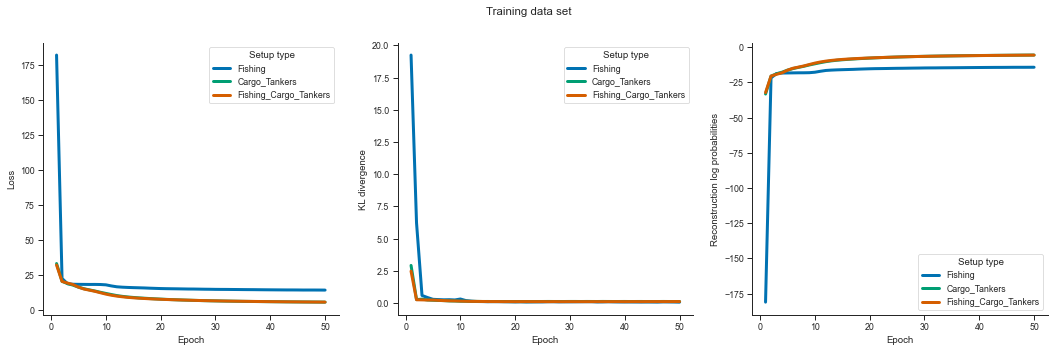

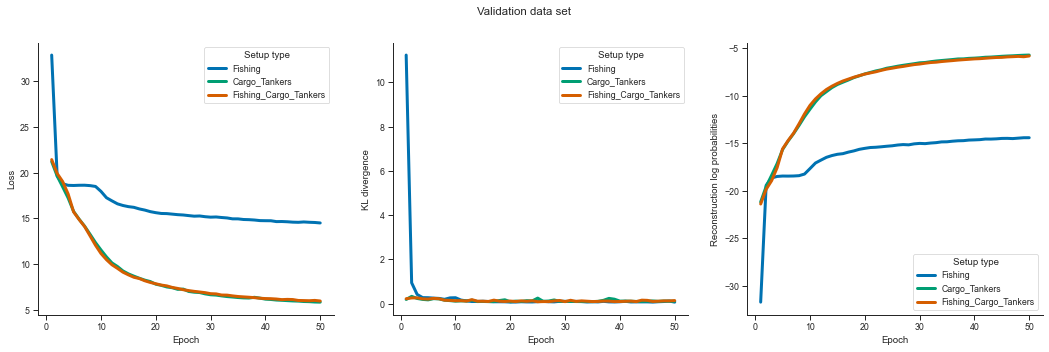

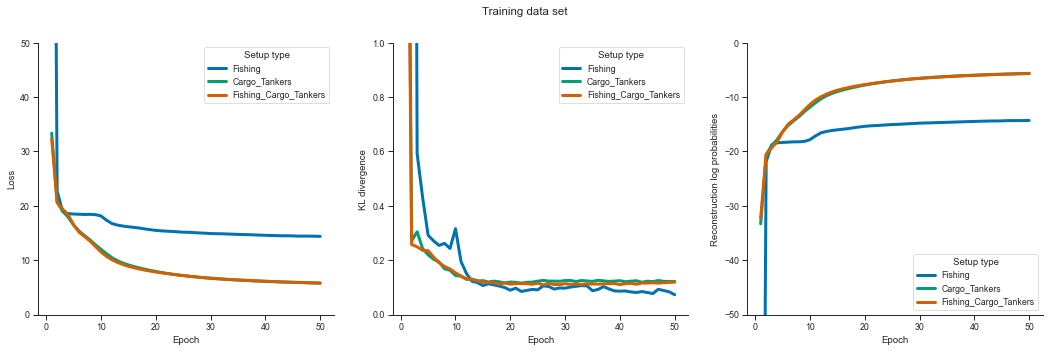

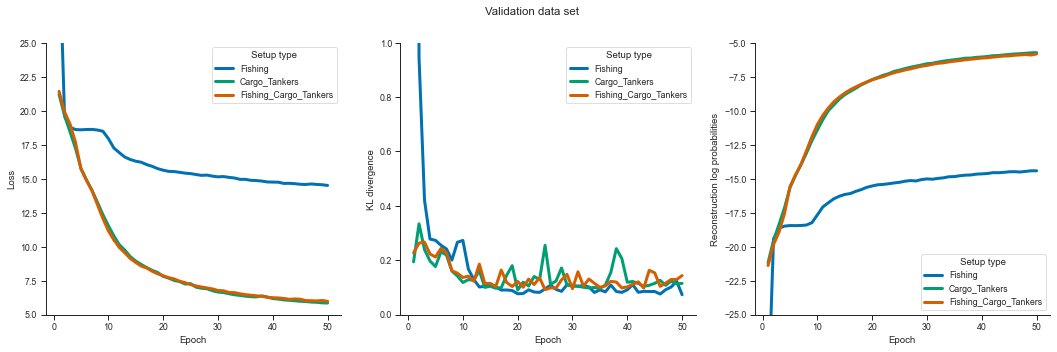

In [3]:
df_annealing_fish = utils.curves_df("Fishing", "RegionBornholm_01062019_30092019_Fish_14400_86400_600",
                                    model_dir, kl_annealing=True)
df_annealing_carg_tank = utils.curves_df("Cargo_Tankers", "RegionBornholm_01062019_30092019_CargTank_14400_86400_600",
                                         model_dir, kl_annealing=True)
df_annealing_fish_carg_tank = utils.curves_df("Fishing_Cargo_Tankers", "RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600",
                                              model_dir, kl_annealing=True)

df = pd.concat([df_annealing_fish, df_annealing_carg_tank, df_annealing_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                  ylims=[(0, 50), (0, 1), (-50, 0)])
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                  ylims=[(5, 25), (0, 1), (-25, -5)])